<a href="https://colab.research.google.com/github/ask350/UM-Projects/blob/main/ASL%20detection/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import gdown
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models

In [2]:
# Dataset
gdown.download("https://drive.google.com/file/d/10jqPxcnaV88itOozaBl5tQIDhXsUfZ3J/view?usp=drive_link", "ASL_detection.zip", quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=10jqPxcnaV88itOozaBl5tQIDhXsUfZ3J
From (redirected): https://drive.google.com/uc?id=10jqPxcnaV88itOozaBl5tQIDhXsUfZ3J&confirm=t&uuid=328fe068-a9de-46fb-96ca-85c79049be6d
To: /content/ASL_detection.zip
100%|██████████| 1.10G/1.10G [00:19<00:00, 56.4MB/s]


'ASL_detection.zip'

In [3]:
with zipfile.ZipFile("ASL_detection.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [4]:
train_dir = "dataset/ASL_detection/asl_alphabet_train"
test_dir = "dataset/ASL_detection/asl_alphabet_test"

In [5]:
# data generators
img_size = (64, 64)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_gen.class_indices)
print("Number of classes:", num_classes)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Number of classes: 29


In [6]:
# CNN model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# train model

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 70s 60ms/step - accuracy: 0.4492 - loss: 1.8648 - val_accuracy: 0.6899 - val_loss: 1.0389
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 58s 54ms/step - accuracy: 0.9206 - loss: 0.2365 - val_accuracy: 0.7710 - val_loss: 0.8901
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.9615 - loss: 0.1152 - val_accuracy: 0.7518 - val_loss: 1.1507
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.9749 - loss: 0.0754 - val_accuracy: 0.7861 - val_loss: 0.9538
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 57s 53ms/step - accuracy: 0.9836 - loss: 0.0525 - val_accuracy: 0.7803 - val_loss: 1.0788
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.9835 - loss: 0.0513 - val_accuracy: 0.8017 - val_loss: 1.0253
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 58s 54ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.7530 - val_loss: 1.1526
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.9876 -

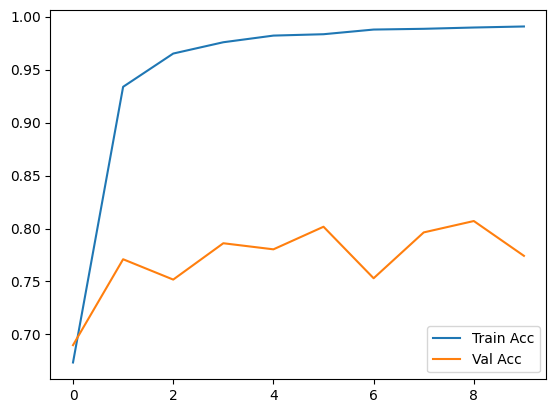

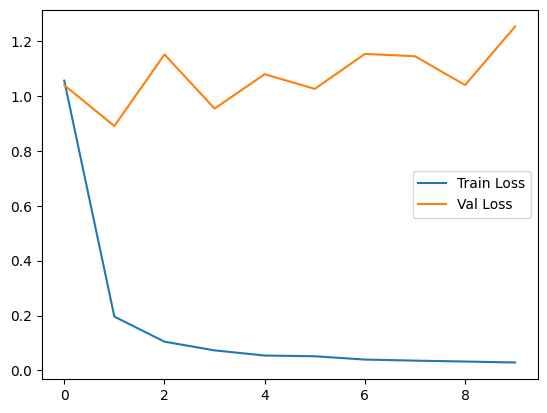

In [8]:
# accurAcy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

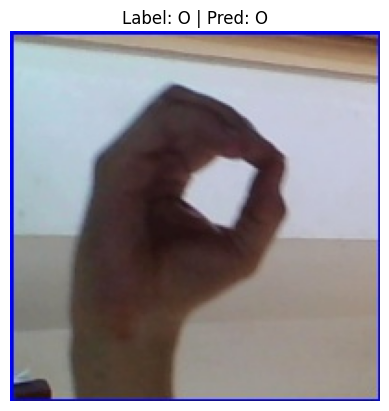

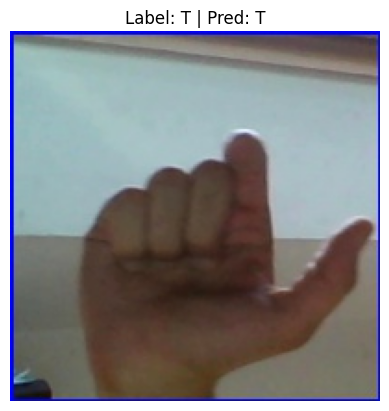

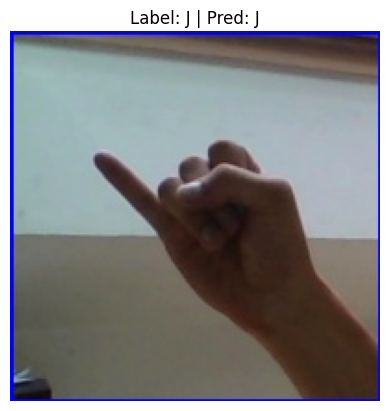

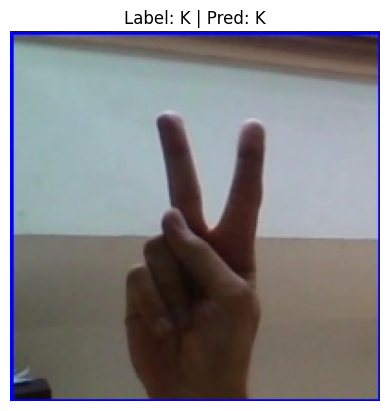

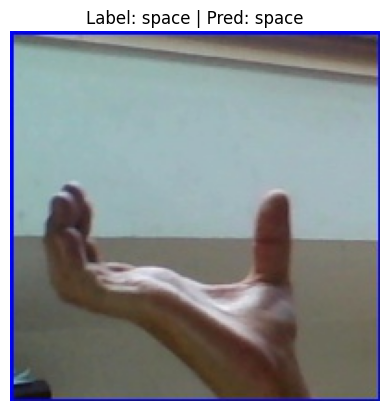

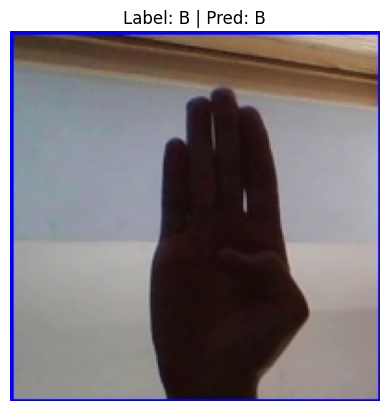

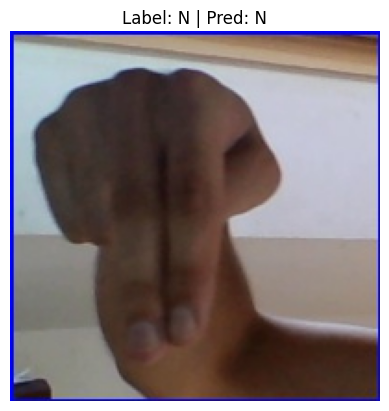

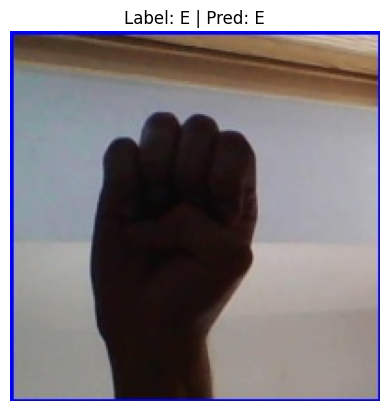

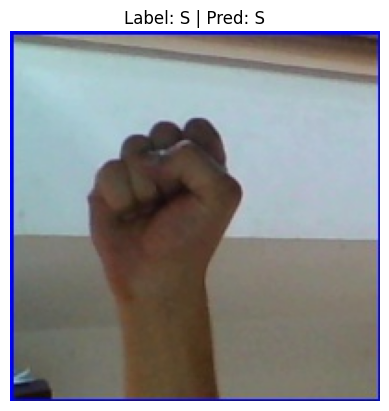

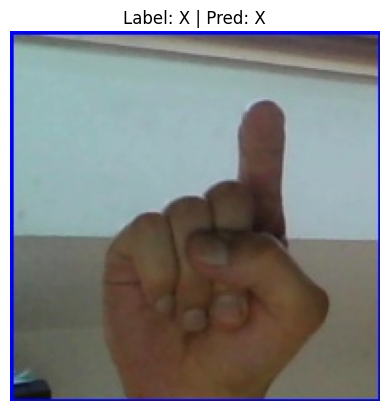

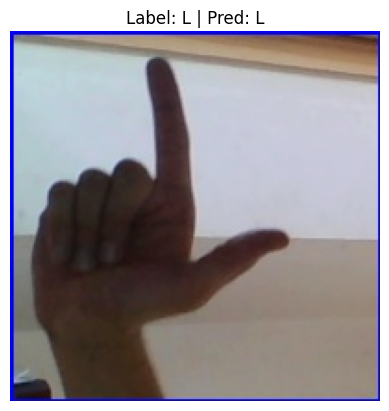

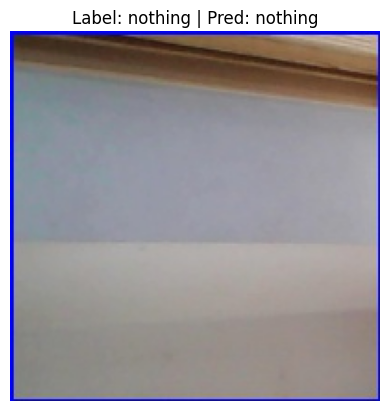

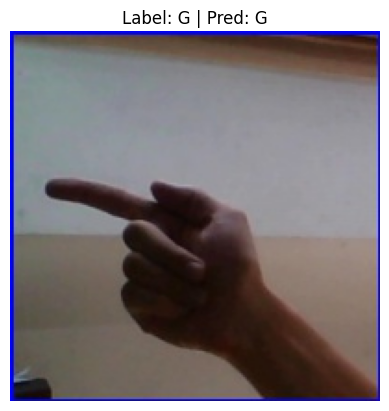

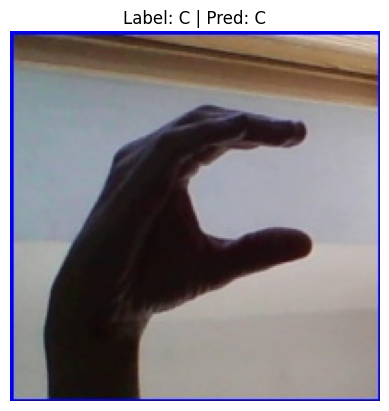

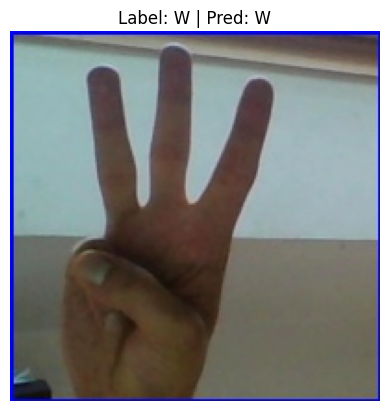

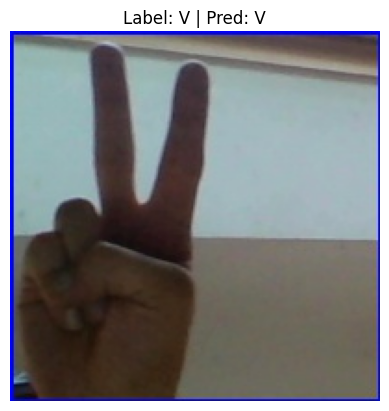

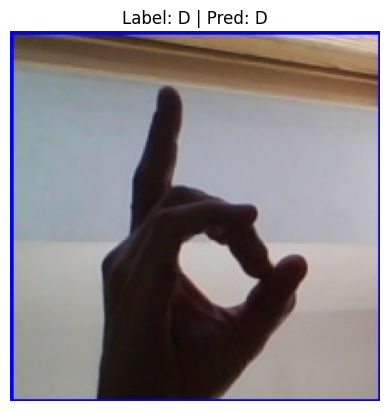

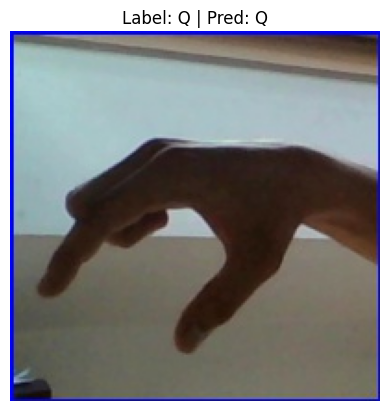

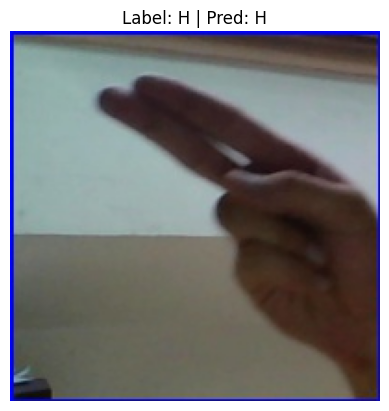

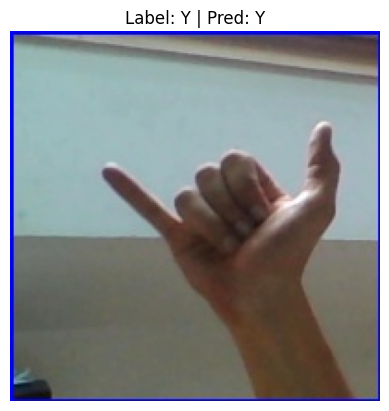

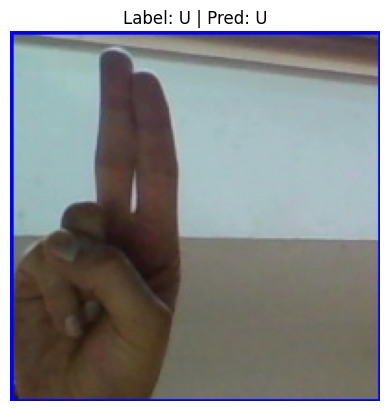

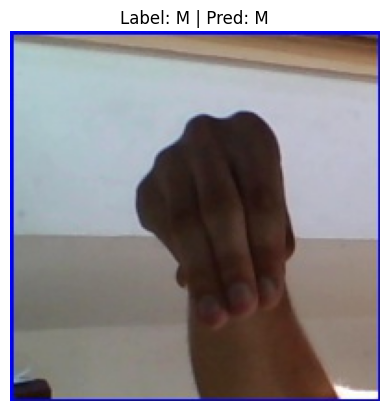

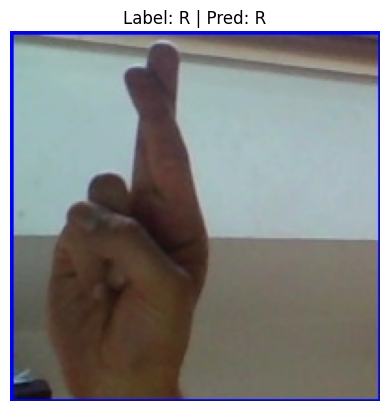

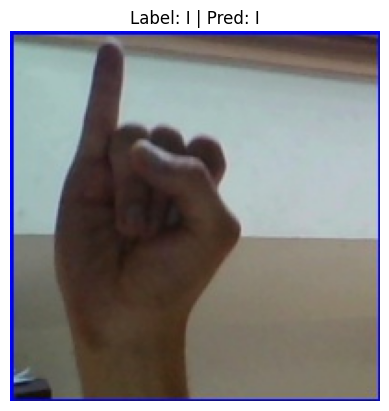

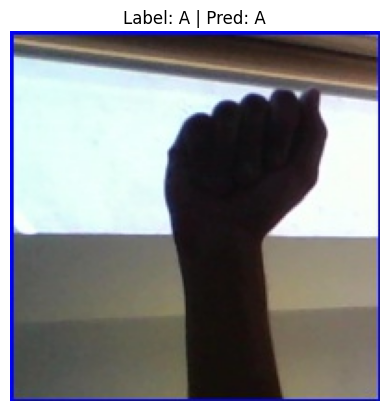

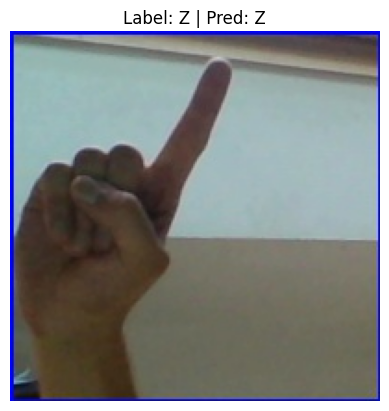

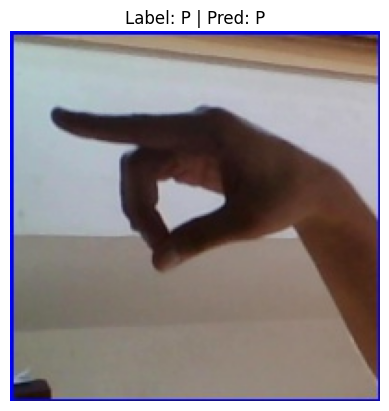

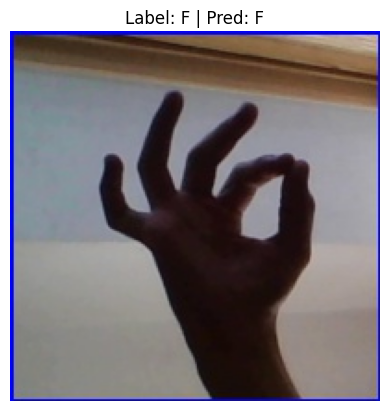

In [9]:
class_names = list(train_gen.class_indices.keys())

for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)

    # image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    pred = model.predict(img_array, verbose=0)
    pred_class = class_names[np.argmax(pred)]

    # label
    true_label = img_file.split("_")[0]

    # image with labels
    plt.imshow(load_img(img_path))
    plt.title(f"Label: {true_label} | Pred: {pred_class}")
    plt.axis("off")
    plt.show()

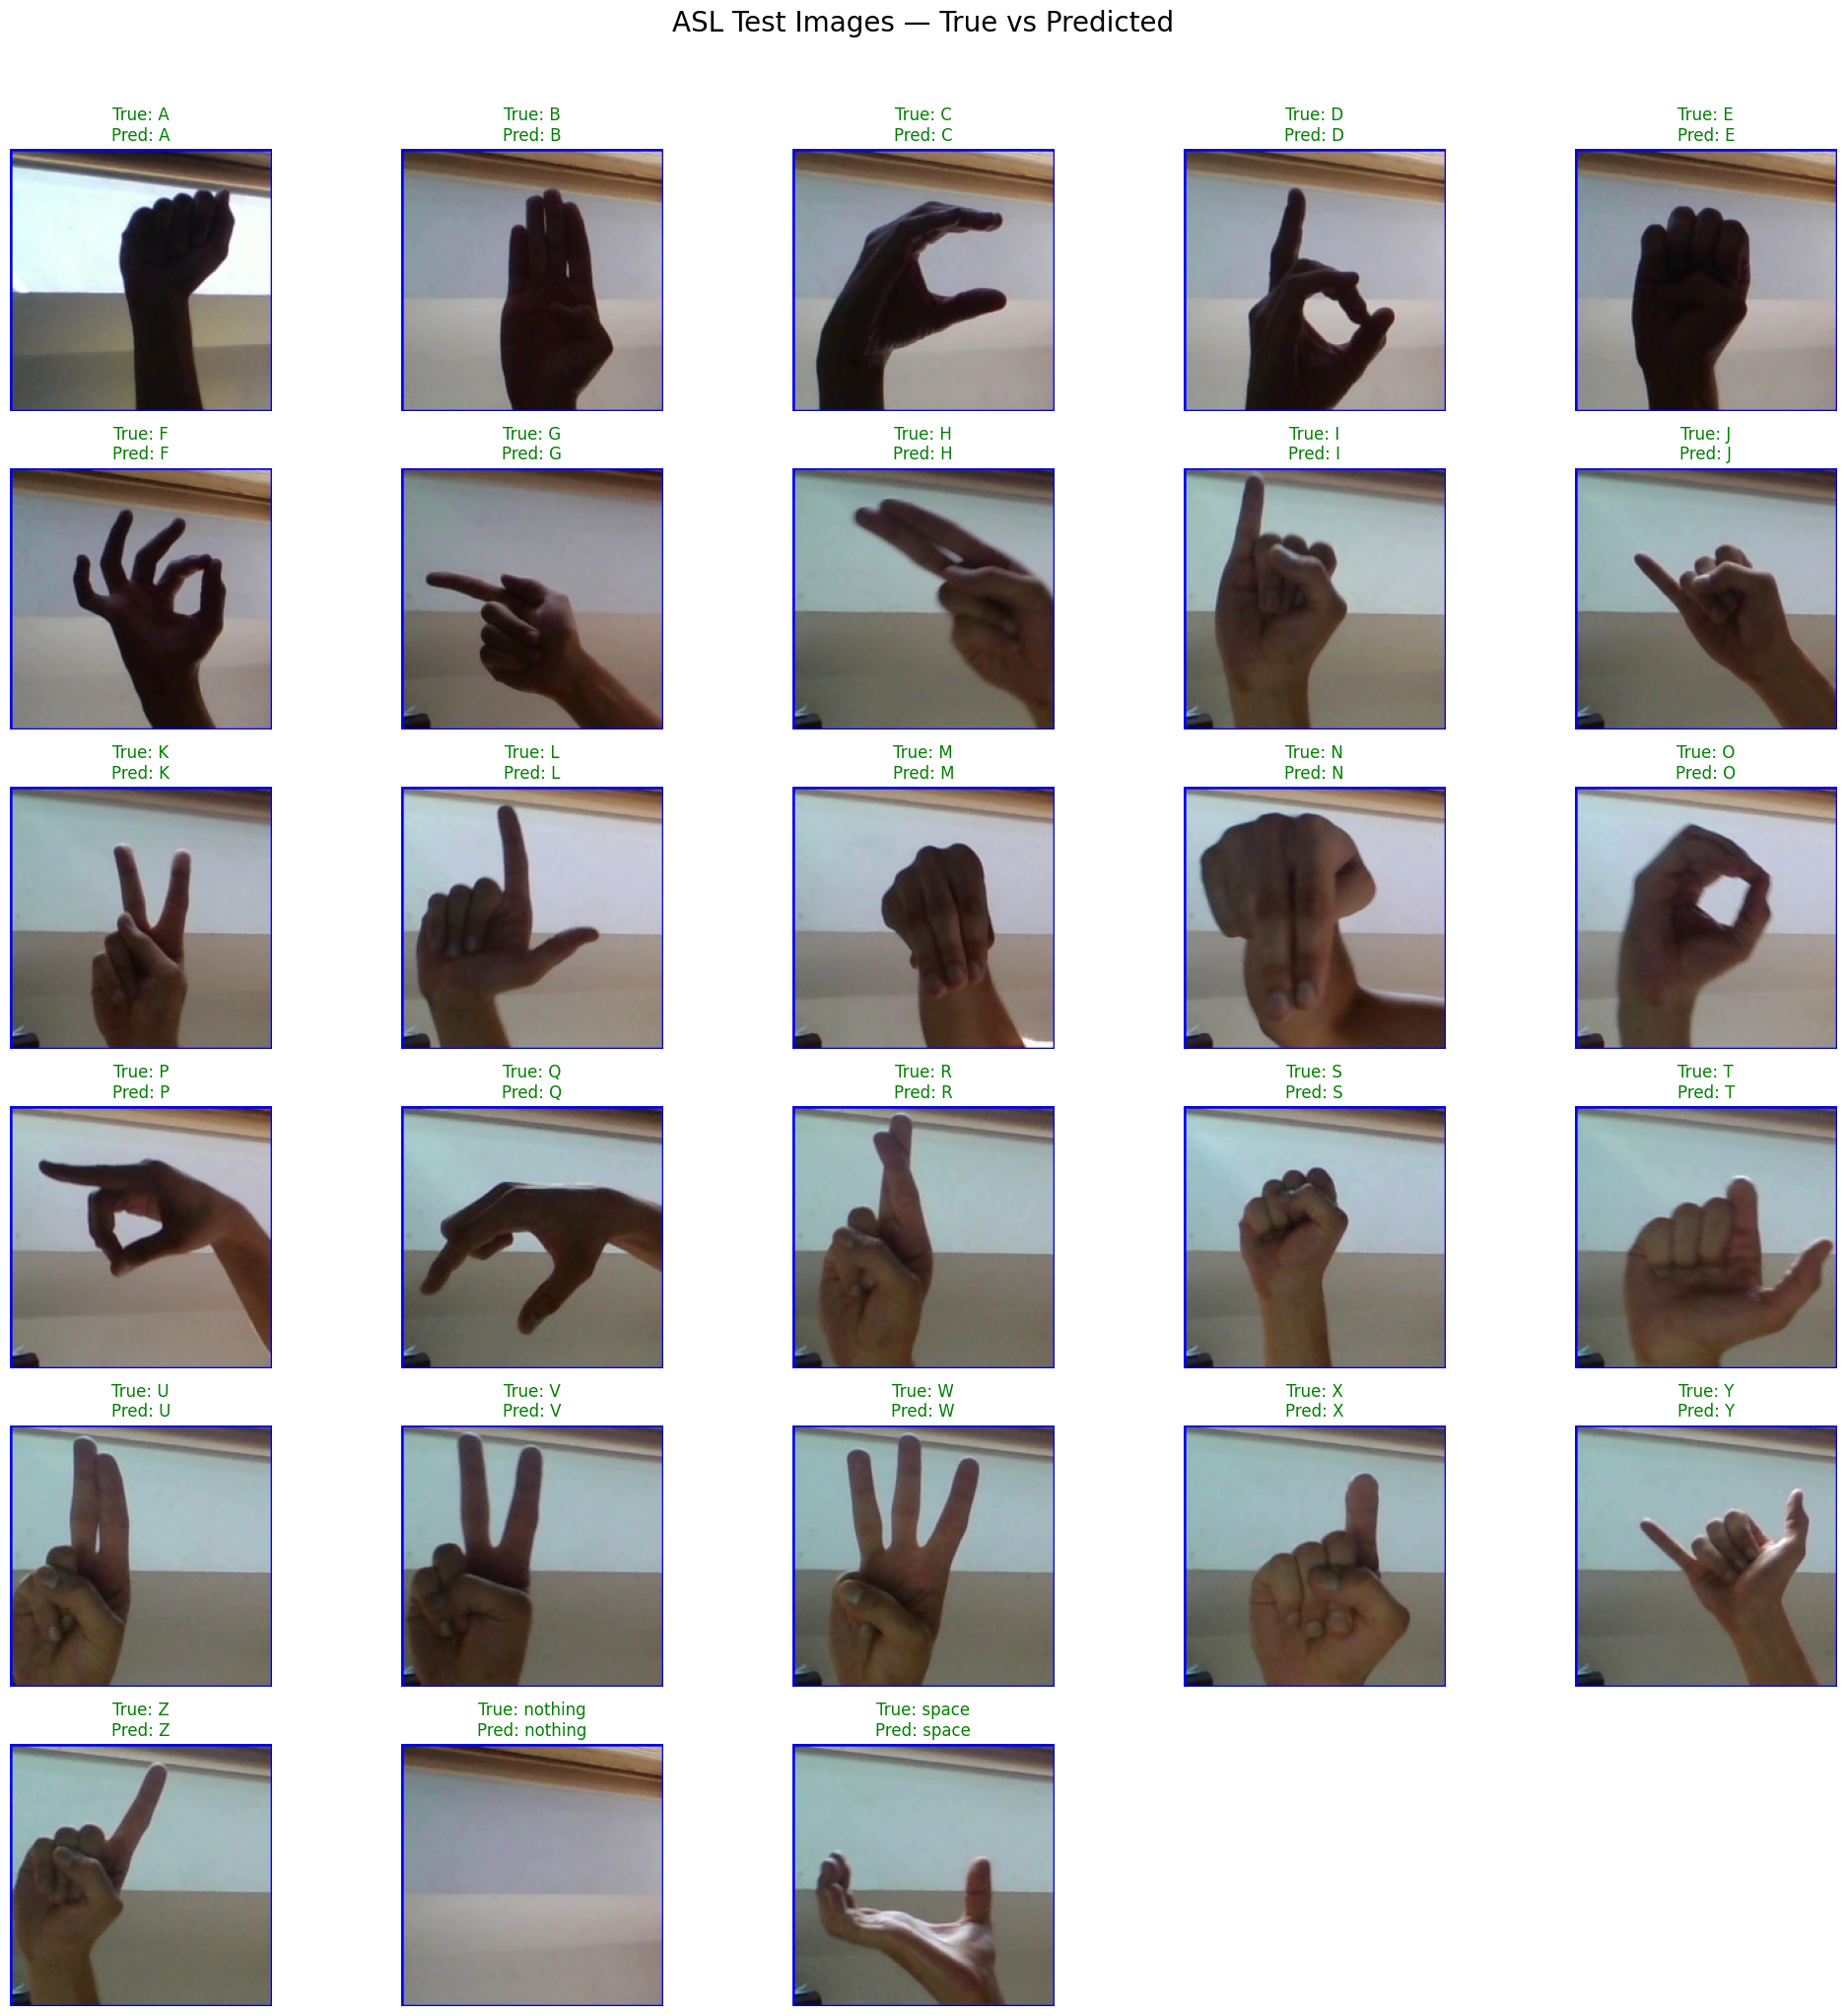


Classification Report:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           Q       1.00      1.00      1.00         1
  

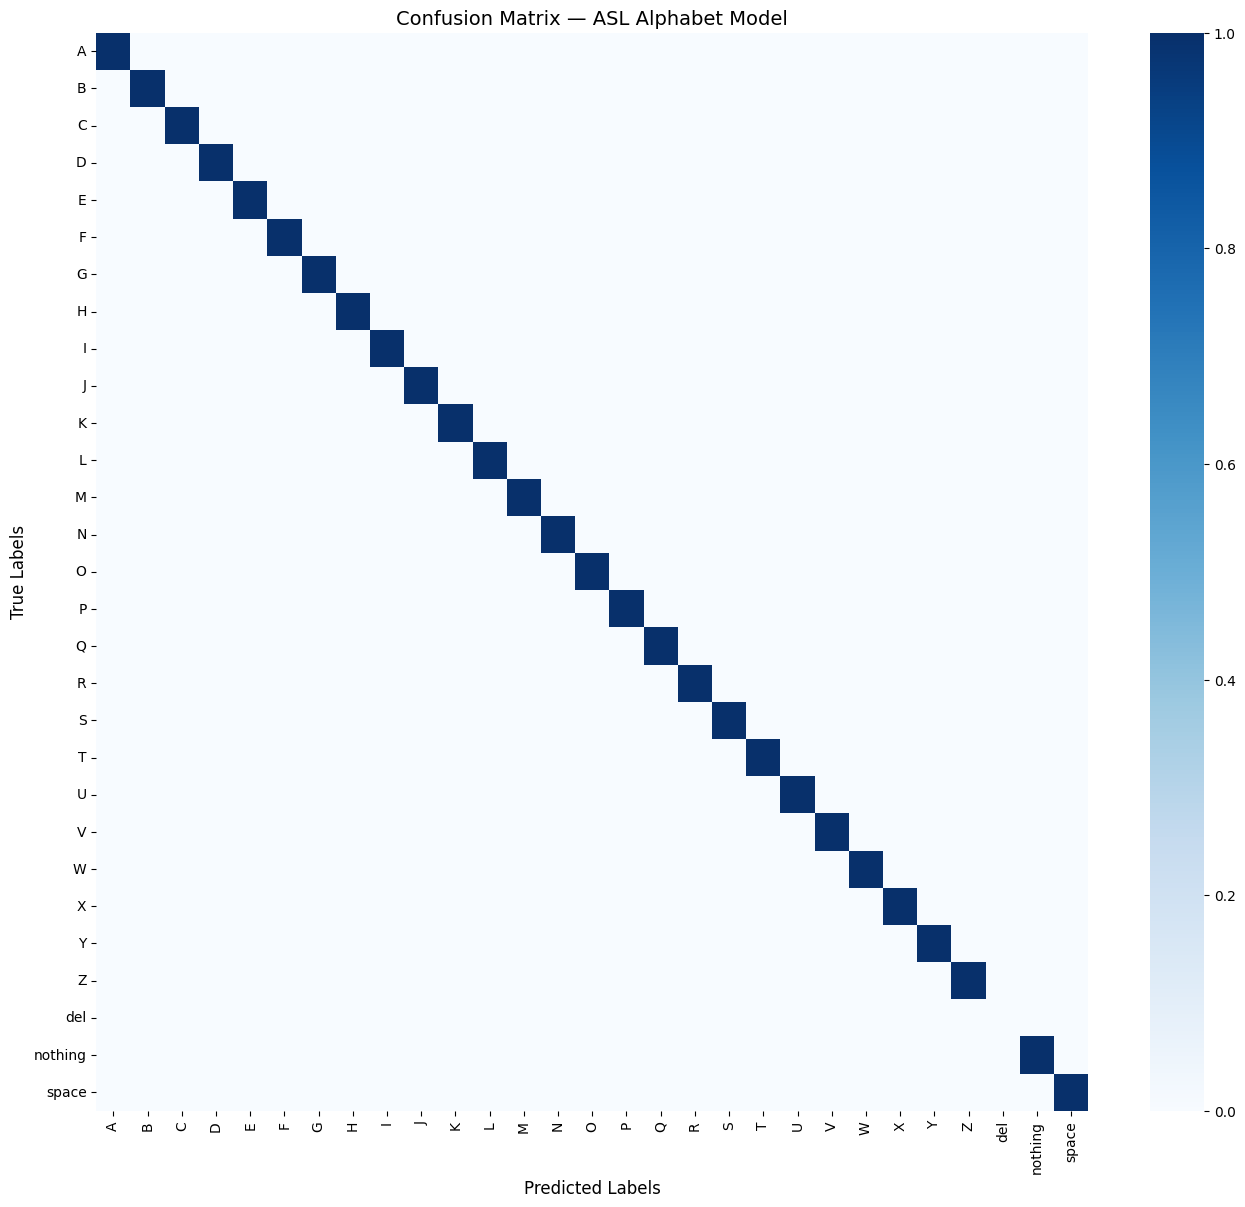

In [11]:
# Evaluation

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Setup
test_dir = "/content/dataset/ASL_detection/asl_alphabet_test"
img_size = (64, 64)

# Same order as your training generator
class_names = sorted(list(train_gen.class_indices.keys()))

# True labels (must match the order of your test images)
true_labels = [img_file.split("_")[0] for img_file in img_files]

# Prediction Loop
pred_labels = []
img_files = sorted(os.listdir(test_dir))

plt.figure(figsize=(20, 20))
cols = 5

for i, img_file in enumerate(img_files):
    img_path = os.path.join(test_dir, img_file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)
    pred_class = class_names[np.argmax(pred)]
    pred_labels.append(pred_class)

    # Visualization per image
    plt.subplot(len(img_files)//cols + 1, cols, i + 1)
    plt.imshow(load_img(img_path))
    color = "green" if pred_class == true_labels[i] else "red"
    plt.title(f"True: {true_labels[i]}\nPred: {pred_class}", color=color)
    plt.axis("off")

plt.suptitle("ASL Test Images — True vs Predicted", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=class_names)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix — ASL Alphabet Model", fontsize=14)
plt.show()



In [12]:
# save model

model.save("asl_alphabet_model.keras")